In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import warnings
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
%matplotlib inline
warnings.filterwarnings('ignore') 

In [3]:
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  drive.mount('/content/drive')
  sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/magec_utils')
  diabetes_fpath = '/content/drive/My Drive/Colab Notebooks/magec_utils/diabetes.csv'
else:
  sys.path.insert(0,'./magec_utils')
  diabetes_fpath = 'diabetes.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import magec_utils as mg
import pima_utils as pm

PIMA Dataset
768 females of age greater than 20.(Smith et al, 1988) and a binary target variable marking whether that woman developed type 2 diabetes within the next 5 years. 

    Pregnancies: Number of times pregnant
    Glucose: Plasma glucose concentration at 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age (years)
    Outcome: Class variable (0 or 1), indicating the onset of non-insulin-dependent diabetes mellitus (DM) within a five-year period

Sorted feature importance from Random Forest Classifier:
0.7672183986108059 -- SpuriousVar
0.08585507167194949 -- Glucose
0.040936579228285176 -- BMI
0.029612338756871817 -- Age
0.0210220407597823 -- Insulin
0.016700084626659978 -- DiabetesPedigreeFunction
0.013864054732717712 -- SkinThickness
0.009033303214820968 -- RandomVar
0.008880947397378122 -- Pregnancies
0.006877181000728556 -- BloodPressure

Evaluating metrics on model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              prec

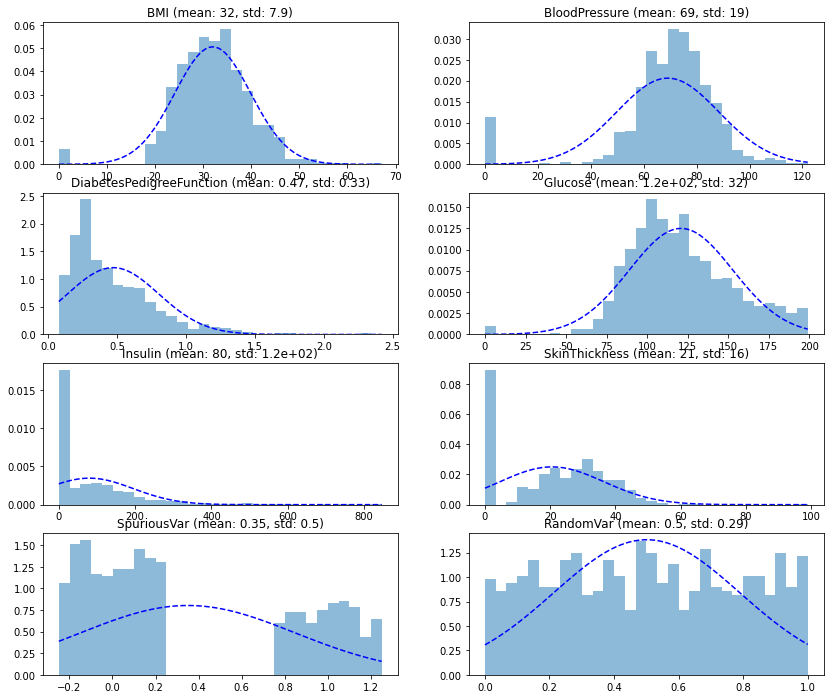

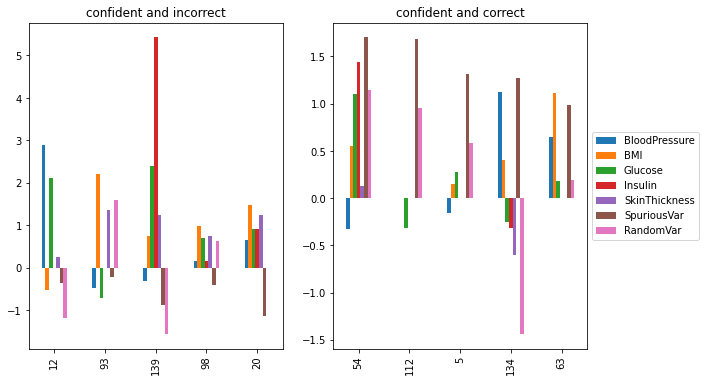

In [5]:
mg.run_magec(diabetes_fpath, cols_to_corr_new_feature=['Outcome'])

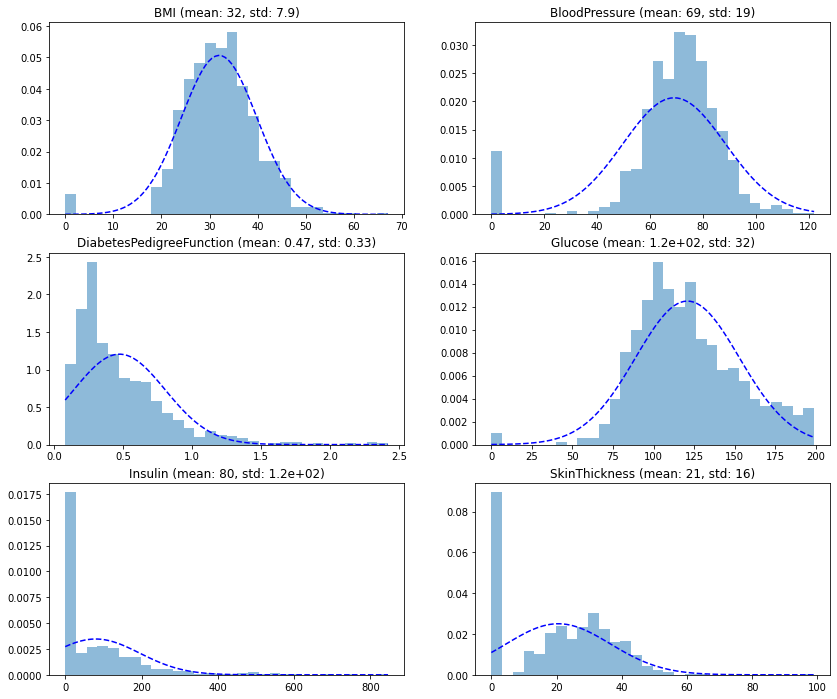

Sorted feature importance from Random Forest Classifier:
0.24239423923583947 -- Glucose
0.16535835078608993 -- BMI
0.13131228248457086 -- DiabetesPedigreeFunction
0.12930062785000895 -- Age
0.0929948846060105 -- Insulin
0.0820028176397164 -- SkinThickness
0.08195636596587659 -- BloodPressure
0.07468043143188732 -- Pregnancies

Evaluating metrics on model:
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.81      0.86     

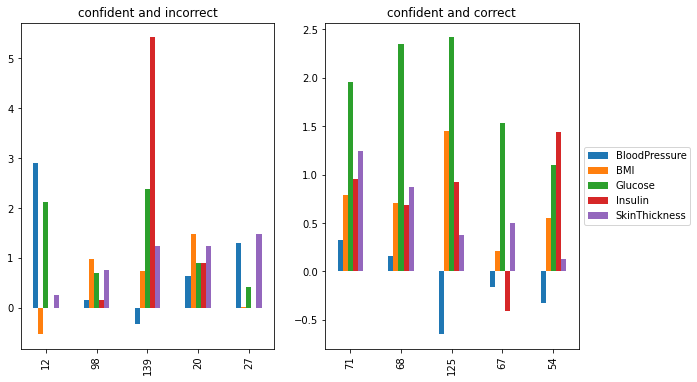

In [6]:
mg.run_magec(diabetes_fpath)

| Model | Gini Impurity Features > 0.1 | Accuracy | Precision | Recall | F1 score | ROC AUC | MAgEC Top Sorted Features |
| :----:| :------: | :-------: | :-----:| :-------:| :-----: | :-----: | :-----: |
|  RandomForest Before Evaluation   |  [SpuriousVar]   |  1.0   |   1.0   |  1.0  |   1.0   |   1.0  |   [SpuriousVar]  |
|  RandomForest After Evaluation   |   [Glucose, BMI, DiabetesPedigreeFunction, Age]  |   0.79  |   0.78   |  0.79  |   0.78   |   0.76  |   [Glucose, BMI, BloodPressure, Insulin]  |